In [1]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('shilmat_data2.csv')
df['Date'] = pd.to_datetime(df.Date)
df=df.drop(columns=['Day'])
# df.to_csv("shilmat_for_manual.csv")
df['DayName'] = df.Date.dt.day_name()
df['DayOfTheWeek'] = df.Date.dt.day_of_week
df['Month'] = df.Date.dt.month
df['MonthName'] =df.Date.dt.month_name()
df['DayOfTheMonth'] =df.Date.dt.day
df

,Date,Income,DayName,DayOfTheWeek,Month,MonthName,DayOfTheMonth
0,2022-09-12,160,Monday,0,9,September,12
1,2022-09-13,150,Tuesday,1,9,September,13
2,2022-09-14,0,Wednesday,2,9,September,14
3,2022-09-15,250,Thursday,3,9,September,15
4,2022-09-16,290,Friday,4,9,September,16
5,2022-09-17,440,Saturday,5,9,September,17
6,2022-09-18,350,Sunday,6,9,September,18
7,2022-09-19,0,Monday,0,9,September,19
8,2022-09-20,700,Tuesday,1,9,September,20
9,2022-09-21,0,Wednesday,2,9,September,21


In [3]:
features = ['Date','DayName','DayOfTheWeek','Month']
X = df[features]
y = df['Income']

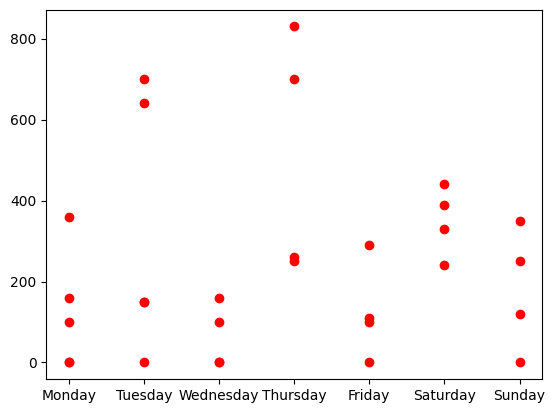

In [18]:
plt.scatter(df['DayName'].values,y.values,c="red")
plt.show()

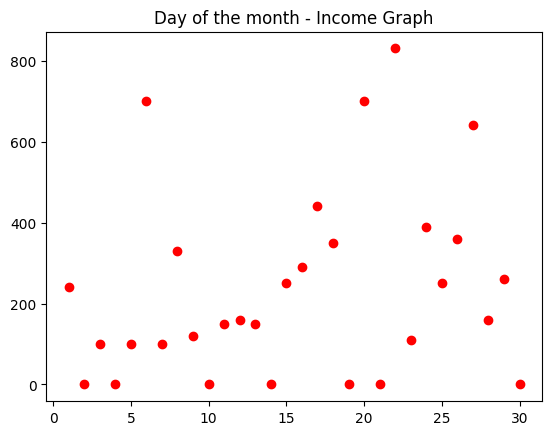

In [30]:
plt.scatter(df['DayOfTheMonth'].values,y.values,c="red")
plt.title("Day of the month - Income Graph")
plt.show()

In [ ]:
plt.bar(df['Day'].values,alpha=0.7,color='orange',width=0.5) 
plt.set_xlabel('Center type') 
plt.set_ylabel('Number of orders') 
plt.set_title('Orders per center type') 
plt.show()

In [ ]:
import datetime


# df=pd.read_csv('shilmat_for_manual.csv')
# df['Date'] = pd.to_datetime(df.Date,errors='ignore')
# df['DayName'] = df.Date.dt.day_name()
# # df['dayName']= df.Date.dt.day_name(df.Date)
# dterror = datetime.date(2022,9,12)

df['Date'][0] = pd.to_datetime(dterror)
df


In [60]:
features=['Date']
X= df[features].values
y= df['Income']

In [61]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(X_train,y_train,)

RandomForestRegressor(random_state=0)

In [63]:
import numpy as np
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

221.39226725430137

In [64]:
from sklearn.ensemble import RandomForestRegressor

max_depth = [None,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]
params={'max_depth': max_depth}
regressor = RandomForestRegressor(random_state=0)
gs  = GridSearchCV(regressor,params,scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                       22, 24, 26, 28, 30]},
             scoring='neg_mean_squared_error')

In [65]:
from sklearn.metrics import mean_squared_error

best_model = gs.best_estimator_
y_pred =best_model.predict(X_test)
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

240.99456259911074